<a href="https://colab.research.google.com/github/arushnab/bonn-eeg-ml/blob/main/week02_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 02 – EEG Power Spectral Density & Bandpower Analysis

computes the Power Spectral Density (PSD) of EEG signals from Set Z using Welch’s method and visualizes the power distribution across standard EEG frequency bands:

- **Delta**: (0.5-4 Hz)
- **Theta**: (4–8 Hz)
- **Alpha**: (8–12 Hz)  
- **Beta**: (12–30 Hz)
- **Gamma**: (30–45 Hz)

In this notebook we will visualize 5 different files from set Z.

### Setup and File Uploads

In [109]:
from google.colab import files
import zipfile
import os

#Upload main ZIP file
uploaded = files.upload()

#Unzip main folder
repo_zip = "bonn-eeg-ml.zip"
with zipfile.ZipFile(repo_zip, 'r') as zip_ref:
    zip_ref.extractall()

#Unzip inner data ZIPs
base_path = "bonn-eeg-ml"

sys.path.append(os.path.join(base_path, "scripts"))

# Extract set Z EEG data
z_zip = os.path.join(base_path, "z.zip")
z_folder = os.path.join(base_path, "z")

if not os.path.exists(z_folder):
    with zipfile.ZipFile(z_zip, 'r') as zip_ref:
        zip_ref.extractall(z_folder)



Saving bonn-eeg-ml.zip to bonn-eeg-ml (5).zip


###Import Functions

In [101]:
import sys

# Add path to import scripts
sys.path.append("bonn-eeg-ml")

from scripts.preprocess import load_eeg_folder
from scripts.extract_features import extract_bandpowers
import matplotlib.pyplot as plt
import numpy as np

###Load EEG Signals (Set Z)

In [105]:
z_folder = "bonn-eeg-ml/z (2)/z/Z"
# Load 5 signals
z_signals = load_eeg_folder(z_folder, limit=5)

###Plot EEG Time-Domain Signals

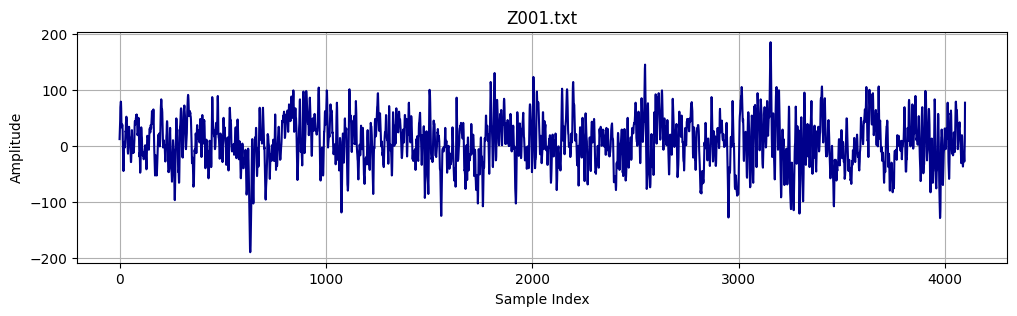

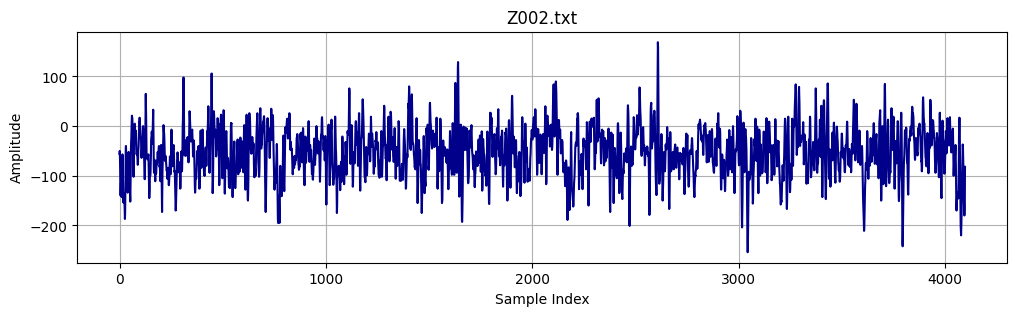

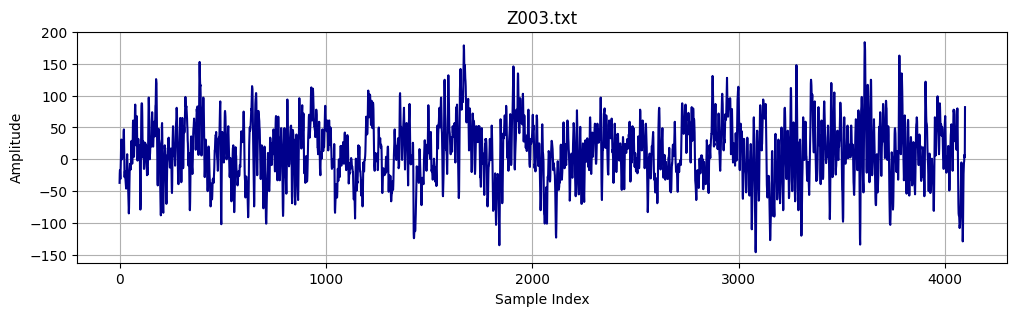

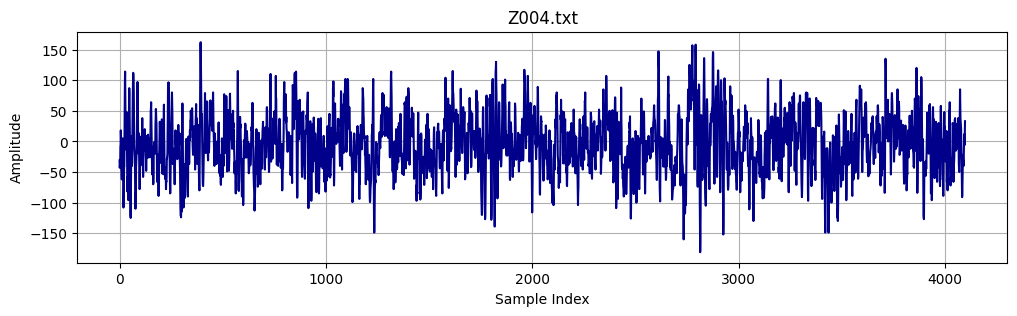

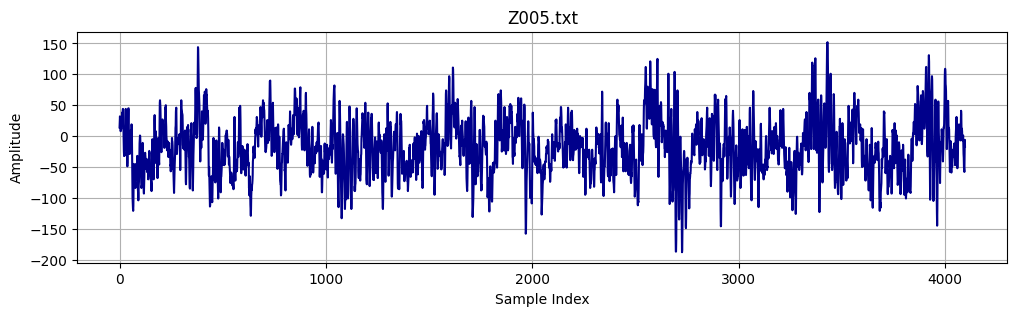

In [110]:
def plot_signal(signal, title="EEG Signal"):
    plt.figure(figsize=(12, 3))
    plt.plot(signal, color='darkblue')
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

for filename, signal in z_signals:
    plot_signal(signal, title=filename)


###Plot Bandpower From PSD

####Bar Chart

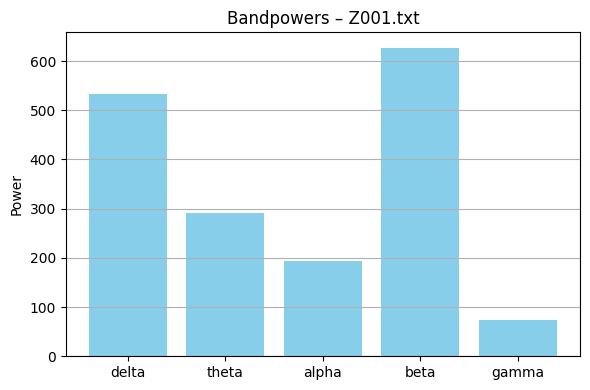

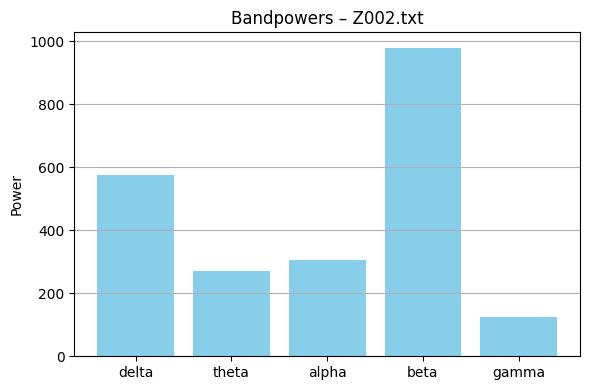

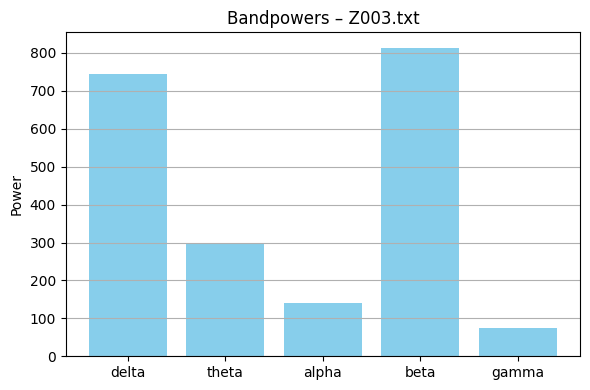

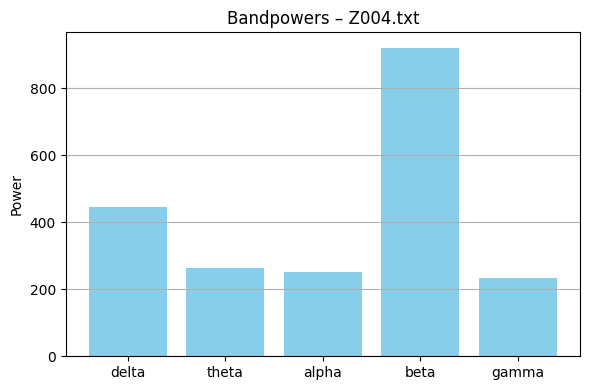

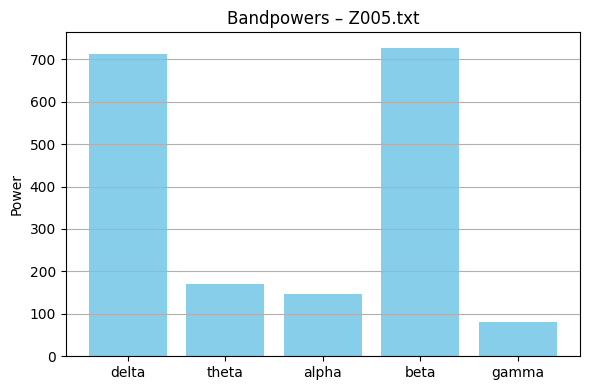

In [108]:
for filename, signal in z_signals:
    bands = extract_bandpowers(signal)

    plt.figure(figsize=(6, 4))
    plt.bar(bands.keys(), bands.values(), color='skyblue')
    plt.title(f"Bandpowers – {filename}")
    plt.ylabel("Power")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


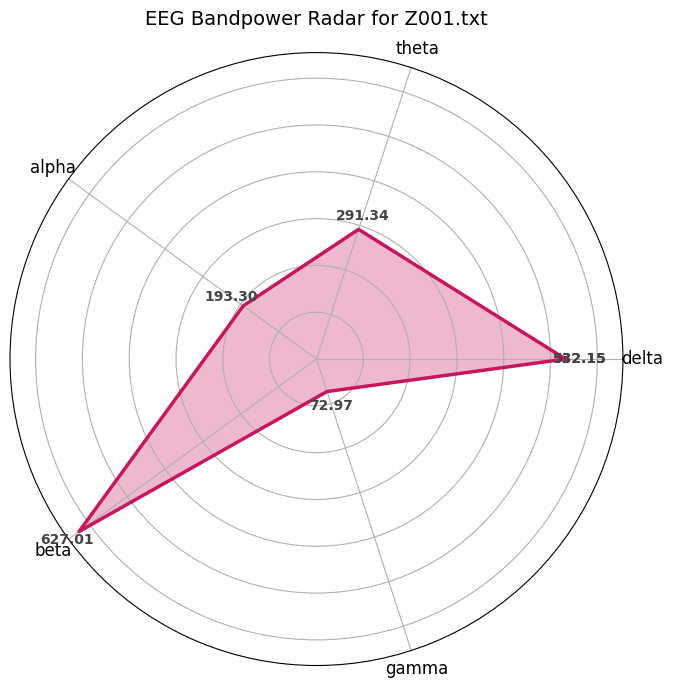

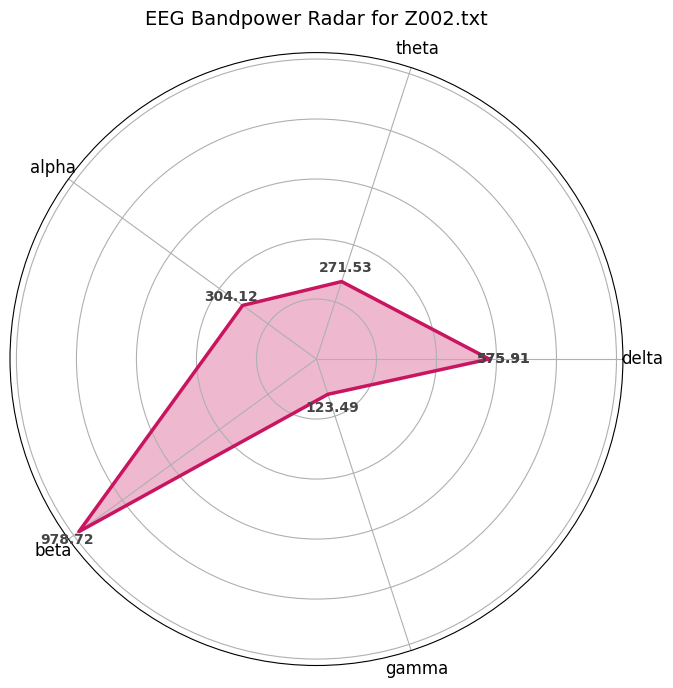

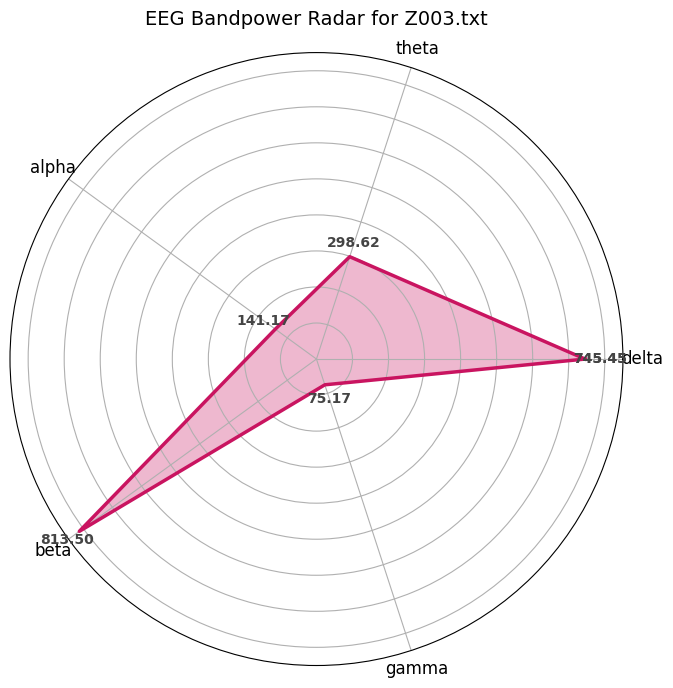

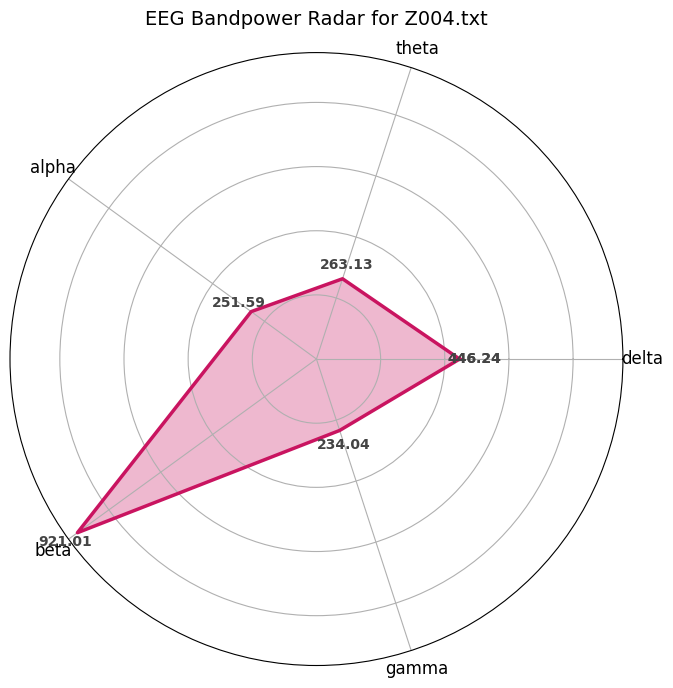

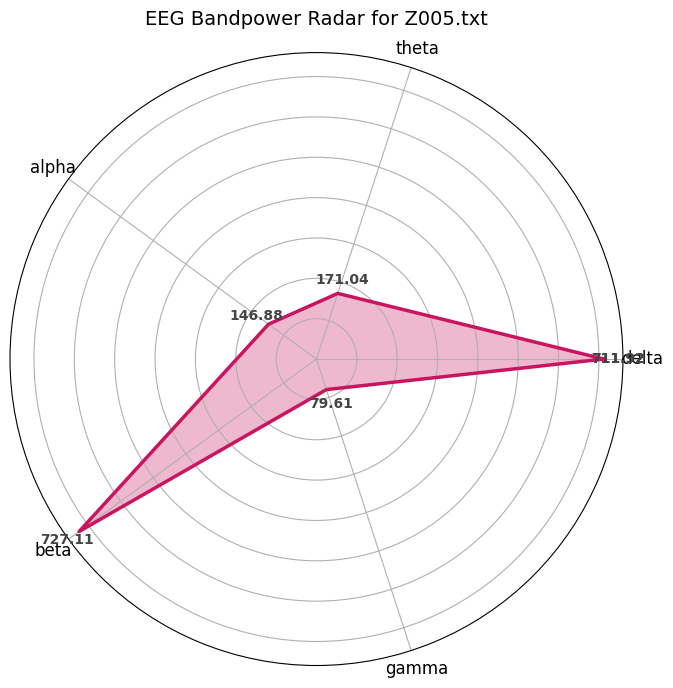

In [113]:
def plot_bandpower_radar(signal, label="Sample Signal"):
    import numpy as np
    import matplotlib.pyplot as plt
    from math import pi

    # Bandpower Extraction
    bp = extract_bandpowers(signal)
    bands = list(bp.keys())
    values = list(bp.values())
    values += values[:1]  # Loop back to the first value

    # Positioning for Radar Plot
    angles = [n / float(len(bands)) * 2 * pi for n in range(len(bands))]
    angles += angles[:1]

    # Plot set up
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2.5, linestyle='-', color="#C91460", label=label)
    ax.fill(angles, values, color="#C91460", alpha=0.3)

    # Value labels
    for angle, value, band in zip(angles, values, bands + [bands[0]]):
        ax.text(angle, value + max(values) * 0.05, f"{value:.2f}",
                ha='center', va='center', fontsize=10, color="#444", fontweight='bold')

    # Axis Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(bands, fontsize=12)
    ax.set_yticklabels([], color='gray')  # Still hide circular labels
    ax.set_title(f"EEG Bandpower Radar for {label}", size=14, pad=20)


    plt.tight_layout()
    plt.show()

# Plot radar charts for the first 5 signals
for i in range(5):
    signal_data = z_signals[i][1]
    filename = z_signals[i][0]
    plot_bandpower_radar(signal_data, label=filename)
